In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('features.csv')
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [3]:
#check for null values
df.isnull().sum()


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

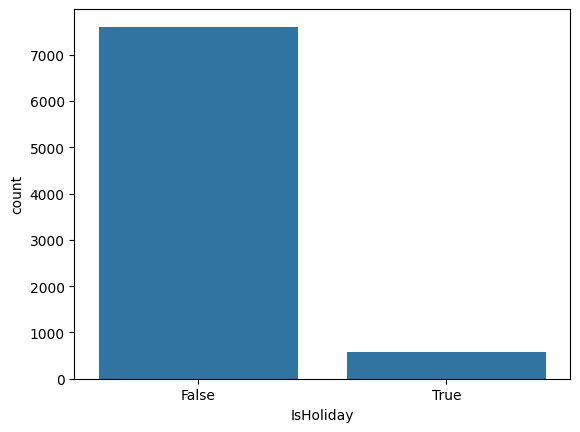

In [4]:
#show distribution of isholiday
sns.countplot(x='IsHoliday', data=df)
plt.show()


In [5]:
#Statistical summary of the data
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


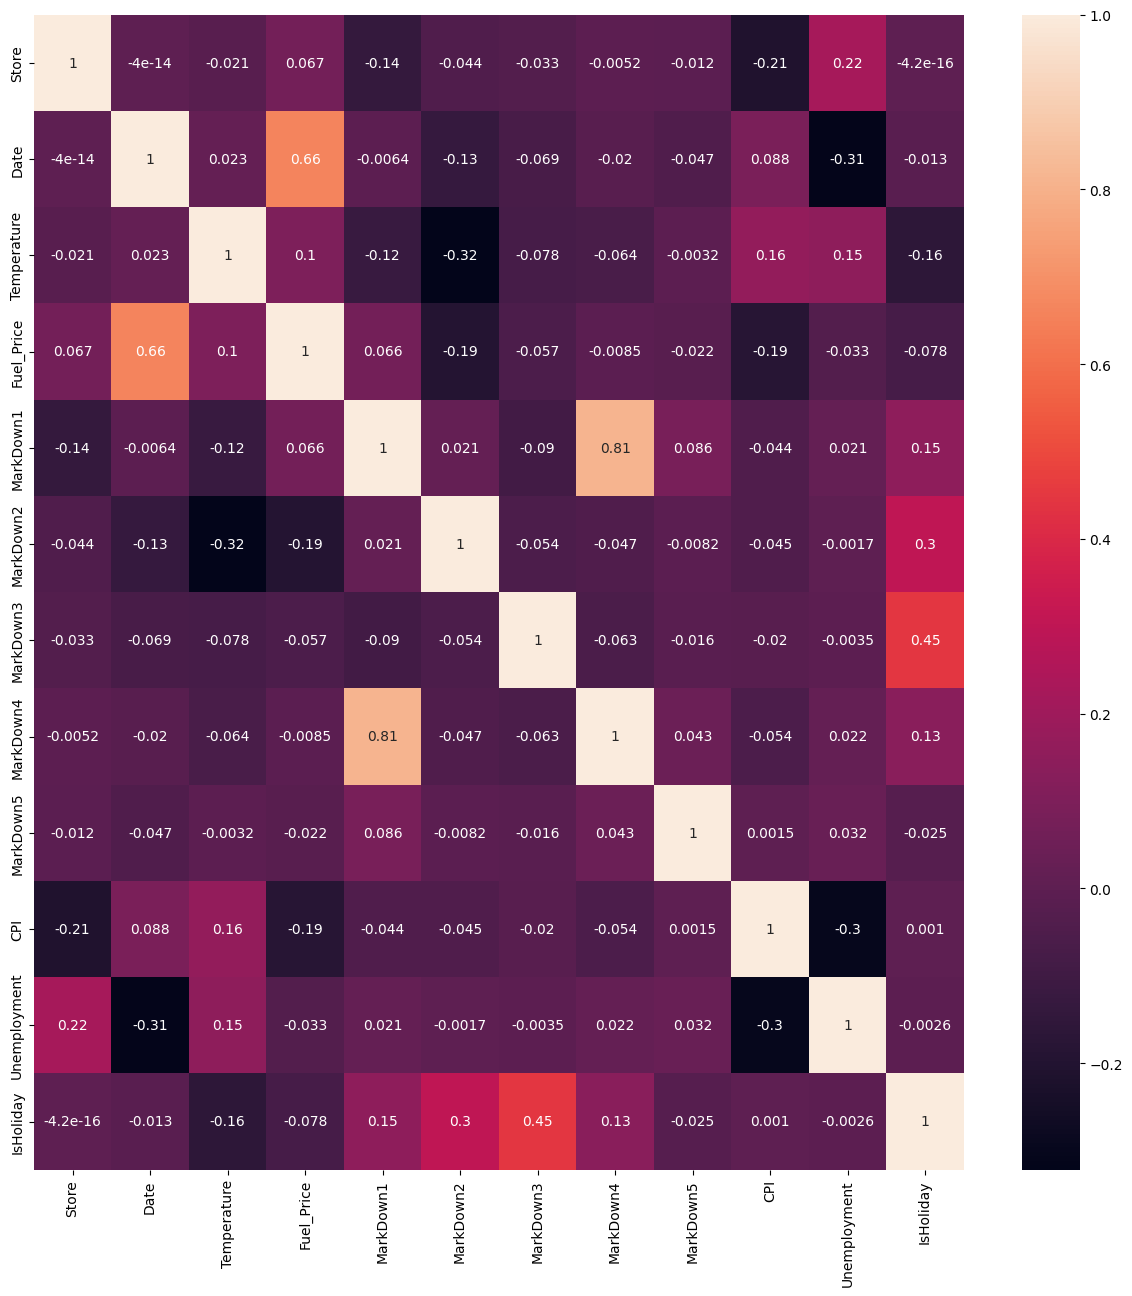

In [7]:
#plot correlation matrix
plt.figure(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()




In [8]:
#drop all markdown columns
df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)
df

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False
...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,NaN,NaN,False


In [9]:
df.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64

In [10]:
#handle missing values in CPI and unemployment
df['CPI'].fillna(df['CPI'].mean(), inplace=True)
df['Unemployment'].fillna(df['Unemployment'].mean(), inplace=True)
df.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [11]:
df.corr()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Store,1.000000e+00,-3.955220e-14,-0.020566,0.066682,-0.201670,0.213108,-4.186667e-16
Date,-3.955220e-14,1.000000e+00,0.022788,0.662724,0.078326,-0.280027,-1.319757e-02
Temperature,-2.056605e-02,2.278792e-02,1.000000,0.101354,0.158709,0.145643,-1.619056e-01
Fuel_Price,6.668205e-02,6.627236e-01,0.101354,1.000000,-0.184127,-0.032900,-7.823797e-02
CPI,-2.016696e-01,7.832630e-02,0.158709,-0.184127,1.000000,-0.303110,1.005442e-03
Unemployment,2.131079e-01,-2.800274e-01,0.145643,-0.032900,-0.303110,1.000000,-2.636558e-03
IsHoliday,-4.186667e-16,-1.319757e-02,-0.161906,-0.078238,0.001005,-0.002637,1.000000e+00


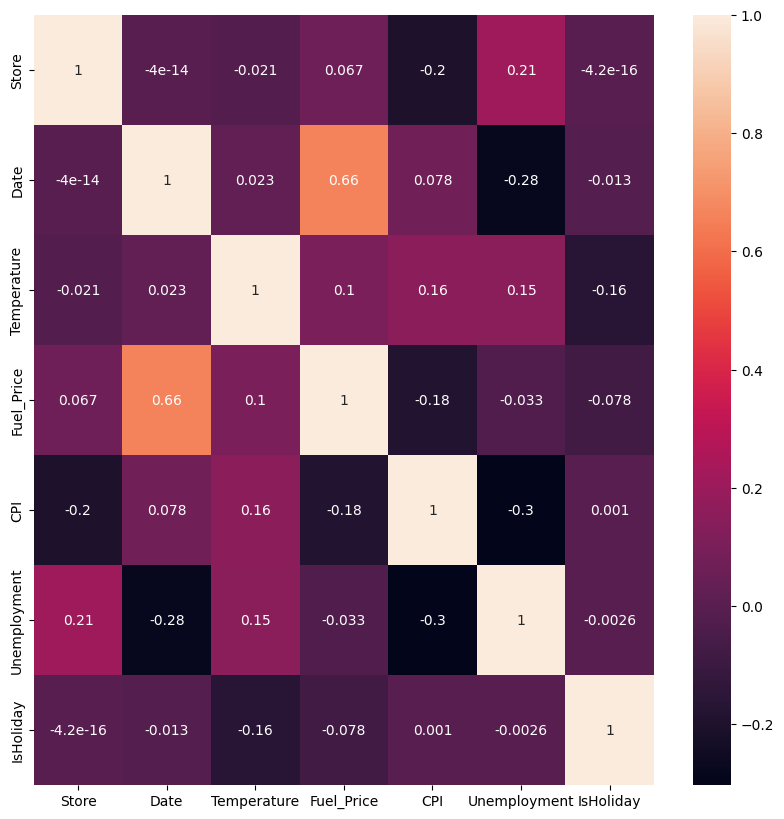

In [12]:
#plot correlation matrix
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [13]:
X = df.drop(['IsHoliday','Date','Store'],axis=1).values
y = df['IsHoliday'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**KNN CLASSIFICATION**

In [14]:

# Train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)




KNeighborsClassifier(n_neighbors=9)

In [15]:
predictedKnn = knn.predict(X_test)


In [16]:

print("KNN Accuracy:", knn.score(X_test, y_test) * 100)

KNN Accuracy: 92.73504273504274


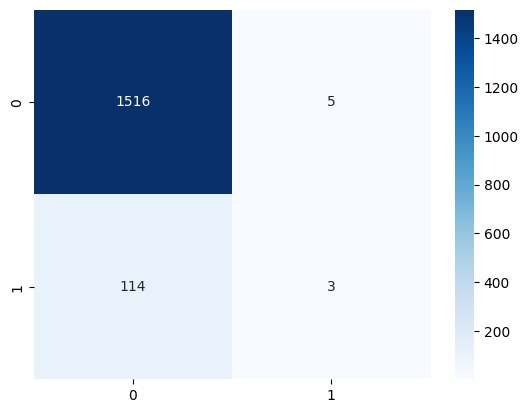

In [17]:
#plot confusion matrix for KNN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictedKnn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()


**LOGISTIC REGRESSION**

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
#predict on test set
y_pred = model.predict(X_test)
y_pred


array([False, False, False, ..., False, False, False])

In [20]:

print("LogisticRegression Accuracy = ", model.score(X_test, y_test) * 100, "%")


LogisticRegression Accuracy =  92.85714285714286 %


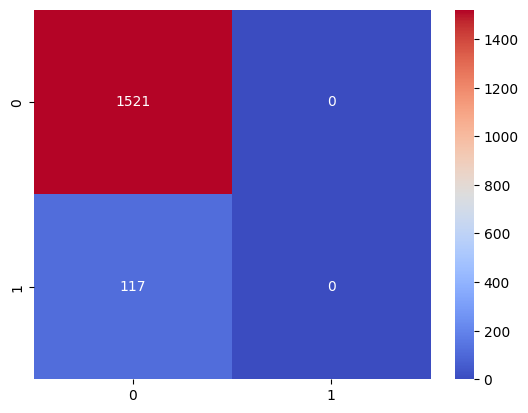

In [21]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.show()

In [22]:
#compare the two models
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(classification_report(y_test, predictedKnn))


              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1521
        True       0.00      0.00      0.00       117

    accuracy                           0.93      1638
   macro avg       0.46      0.50      0.48      1638
weighted avg       0.86      0.93      0.89      1638

              precision    recall  f1-score   support

       False       0.93      1.00      0.96      1521
        True       0.38      0.03      0.05       117

    accuracy                           0.93      1638
   macro avg       0.65      0.51      0.51      1638
weighted avg       0.89      0.93      0.90      1638



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
